##Scrapping The Data From E-Jal Shakti Portal

In [1]:
import requests
from bs4 import BeautifulSoup

# URL of the webpage to scrape
url = "https://ejalshakti.gov.in/JJM/JJMReports/BasicInformation/JJMRep_AbstractData_P.aspx?Istate=LmYh8%2bZGmQs%3d&IAgency=TShh%2fRgOLjs%3d&IDistrict=OfbZowzmR74%3d&Iblock=dc9mfQV3m0c%3d&IFinyear=joOf9Wxy6nf0qdH7vFm42w%3d%3d&ICategory=5C1KxeqUjmo%3d"

# Fetch the HTML content of the webpage
response = requests.get(url)

# Check if the request was successful



In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL of the webpage to scrape
url = "https://ejalshakti.gov.in/JJM/JJMReports/BasicInformation/JJMRep_AbstractData_P.aspx?Istate=LmYh8%2bZGmQs%3d&IAgency=TShh%2fRgOLjs%3d&IDistrict=OfbZowzmR74%3d&Iblock=dc9mfQV3m0c%3d&IFinyear=gM%2bgaDUgSoCIzwchG9%2bXOQ%3d%3d&ICategory=5C1KxeqUjmo%3d"

# Fetch the HTML content of the webpage
response = requests.get(url)

# Check if the request was successful
soup=BeautifulSoup(response.text, 'html')





## Data Being Scrapped Now Combining the data of all 325 villages in one single file

In [3]:
table = soup.find('table', {'class': 'w3-table'})

# Extract column names
column_names = []
for th in table.find_all('th'):
    column_names.append(th.text.strip())

# Create an empty DataFrame with the extracted column names
df = pd.DataFrame(columns=column_names[0:8])

In [4]:
# Find all rows in the table
rows = table.find_all('tr')

# Initialize an empty list to store row data
data = []

# Iterate through each row (skipping the header row)
for row in rows[1:]:
    # Extract data from each column
    row_data = []
    for td in row.find_all('td'):
        row_data.append(td.text.strip())

    # Append the row data to the list
    data.append(row_data)

# Create a DataFrame from the list of row data
df = pd.DataFrame(data, columns=column_names[0:7])





In [5]:
df

,S.No.,Panchayat,Total Villages,Villages,Habitations,HouseHolds,Population
0,None,None,None,None,None,None,None
1,1,ANUR,11,11,12,1444,6984
2,2,BATLAHALLY,9,9,9,1602,6533
3,3,BOOMISHETTIHALLY,11,11,13,1212,5602
4,4,BURUDAGUNTE,9,9,12,1997,7728
5,5,CHILAKALANERPU,8,8,11,1345,6069
6,6,CHINNASANDRA,5,5,5,1486,7305
7,7,DHODDAGANJUR,8,8,8,1378,6120
8,8,HIREKATTIGENAHALLY,10,10,11,1425,6620
9,9,IRAGAMPALLI,6,6,9,1097,5154


In [6]:
column_names[7:14]

['', 'Total', '338', '325', '405', '55044', '240341']

In [6]:
df.iloc[0]=column_names[7:14]

#data After removing last row as that include all none values

In [7]:
df=df.iloc[:-1]
df

,S.No.,Panchayat,Total Villages,Villages,Habitations,HouseHolds,Population
0,,Total,338,325,405,55044,240341
1,1,ANUR,11,11,12,1444,6984
2,2,BATLAHALLY,9,9,9,1602,6533
3,3,BOOMISHETTIHALLY,11,11,13,1212,5602
4,4,BURUDAGUNTE,9,9,12,1997,7728
5,5,CHILAKALANERPU,8,8,11,1345,6069
6,6,CHINNASANDRA,5,5,5,1486,7305
7,7,DHODDAGANJUR,8,8,8,1378,6120
8,8,HIREKATTIGENAHALLY,10,10,11,1425,6620
9,9,IRAGAMPALLI,6,6,9,1097,5154


##Updating the Data After removing the first row as it can be considered as outlier because it contains toal statistics

In [8]:
df=df.iloc[1:]
df

,S.No.,Panchayat,Total Villages,Villages,Habitations,HouseHolds,Population
1,1,ANUR,11,11,12,1444,6984
2,2,BATLAHALLY,9,9,9,1602,6533
3,3,BOOMISHETTIHALLY,11,11,13,1212,5602
4,4,BURUDAGUNTE,9,9,12,1997,7728
5,5,CHILAKALANERPU,8,8,11,1345,6069
6,6,CHINNASANDRA,5,5,5,1486,7305
7,7,DHODDAGANJUR,8,8,8,1378,6120
8,8,HIREKATTIGENAHALLY,10,10,11,1425,6620
9,9,IRAGAMPALLI,6,6,9,1097,5154
10,10,KADADHALAMARI,8,8,12,1430,5964


#Performing EDA on the Above Combined Dataset of 325 villages

In [9]:
import pandas as pd


print("First few rows of the dataset:")
print(df.head())

# Check the data types of each column
print("\nData types of each column:")
print(df.dtypes)

# Check for any missing values in the dataset
print("\nMissing values in the dataset:")
print(df.isnull().sum())


First few rows of the dataset:
  S.No.         Panchayat Total Villages Villages Habitations HouseHolds  \
1     1              ANUR             11       11          12       1444   
2     2        BATLAHALLY              9        9           9       1602   
3     3  BOOMISHETTIHALLY             11       11          13       1212   
4     4       BURUDAGUNTE              9        9          12       1997   
5     5    CHILAKALANERPU              8        8          11       1345   

  Population  
1       6984  
2       6533  
3       5602  
4       7728  
5       6069  

Data types of each column:
S.No.             object
Panchayat         object
Total Villages    object
Villages          object
Habitations       object
HouseHolds        object
Population        object
dtype: object

Missing values in the dataset:
S.No.             0
Panchayat         0
Total Villages    0
Villages          0
Habitations       0
HouseHolds        0
Population        0
dtype: int64


##Summary Stats

In [10]:
numerical_summary = df.describe()

print("Summary statistics for numerical columns:")
print(numerical_summary)

categorical_summary = df['Panchayat'].value_counts()

print("\nUnique values and their frequencies for 'Panchayat Name':")
print(categorical_summary)


Summary statistics for numerical columns:
       S.No. Panchayat Total Villages Villages Habitations HouseHolds  \
count     35        35             35       35          35         35   
unique    35        35             10       11          14         35   
top        1      ANUR              9        8          12       1444   
freq       1         1              8        7           5          1   

       Population  
count          35  
unique         35  
top          6984  
freq            1  

Unique values and their frequencies for 'Panchayat Name':
Panchayat
ANUR                  1
PEDDUR                1
MINDIGAL              1
MITTAHALLY            1
MUNAGANAHALLY         1
MURUGAMALLA           1
NADHIGANAHALLY        1
OOLAVADI              1
PERUMACHANAHALLY      1
M.GOLLAHALLY          1
RAGUTTAHALLY          1
SANTHEKALLAHALLY      1
SHETTIHALLY           1
THALAGAVARA           1
UPPARAPETE            1
YEGAVAKOTE            1
MASTHENAHALLY         1
KURABUR        

<ipython-input-11-4f6729238bf7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Habitations'] = df['Habitations'].astype(int)
<ipython-input-11-4f6729238bf7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['HouseHolds'] = df['HouseHolds'].astype(int)
<ipython-input-11-4f6729238bf7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

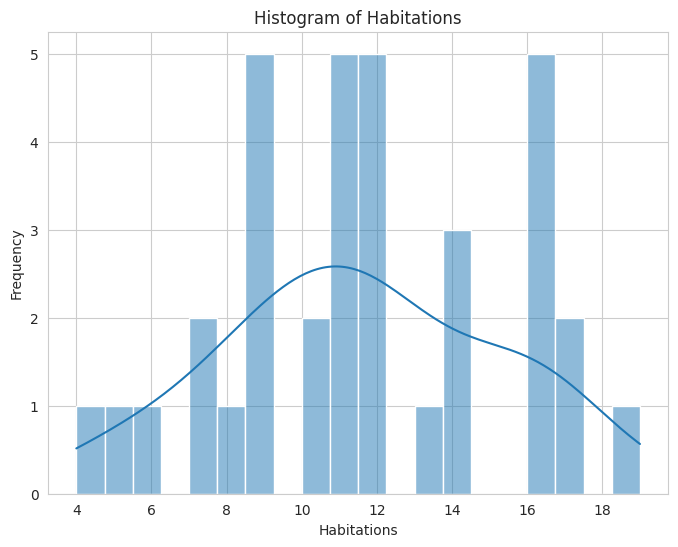

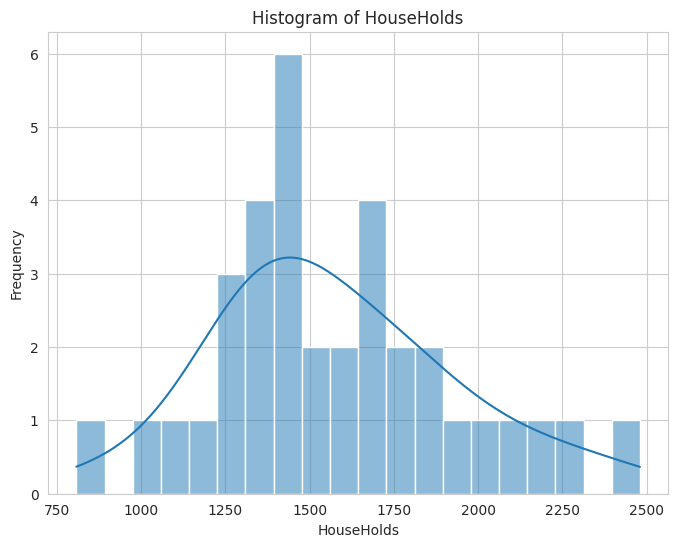

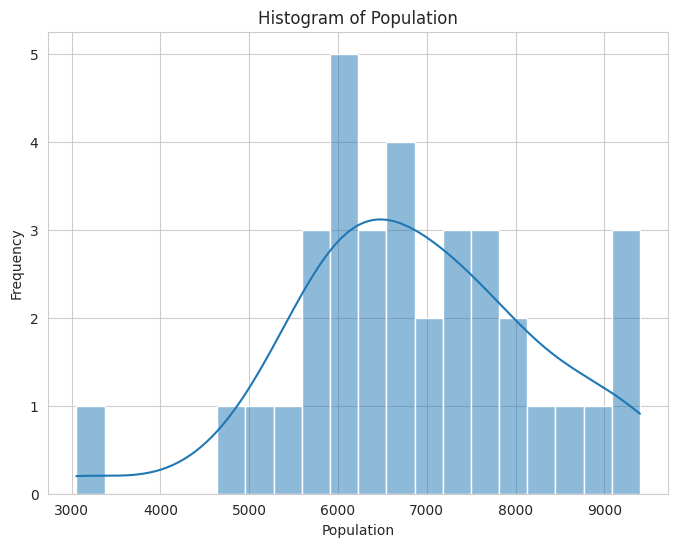

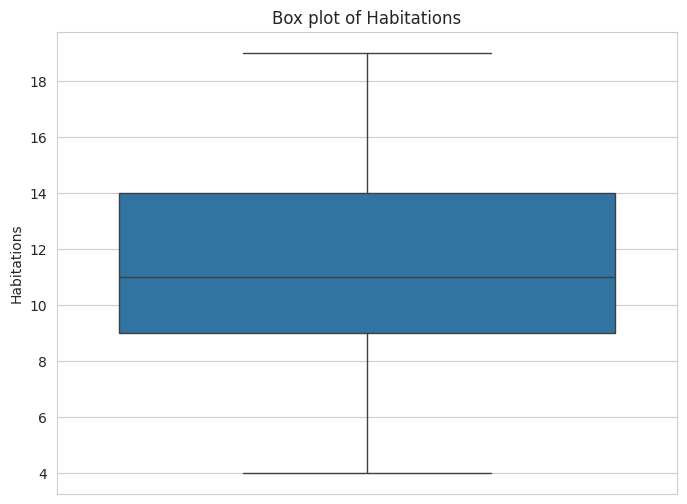

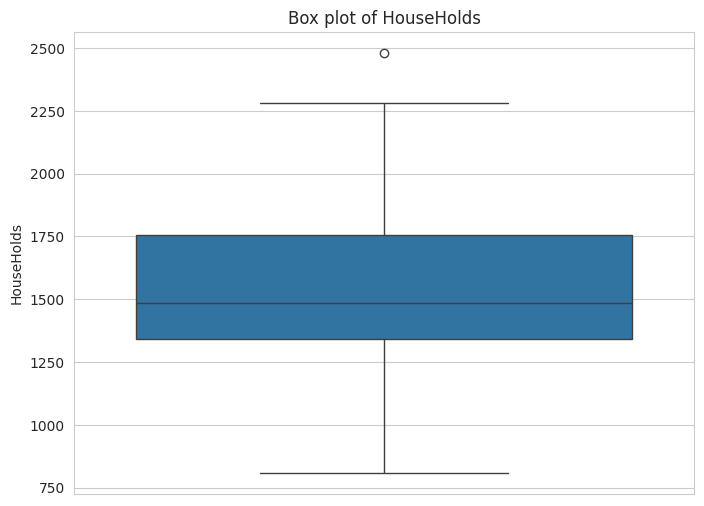

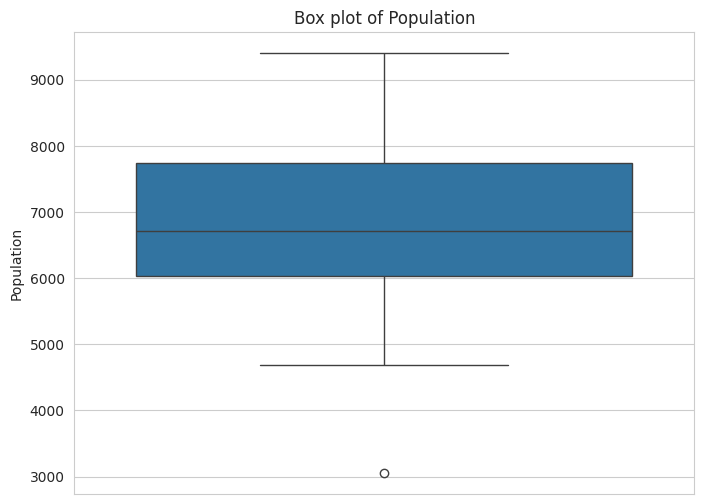

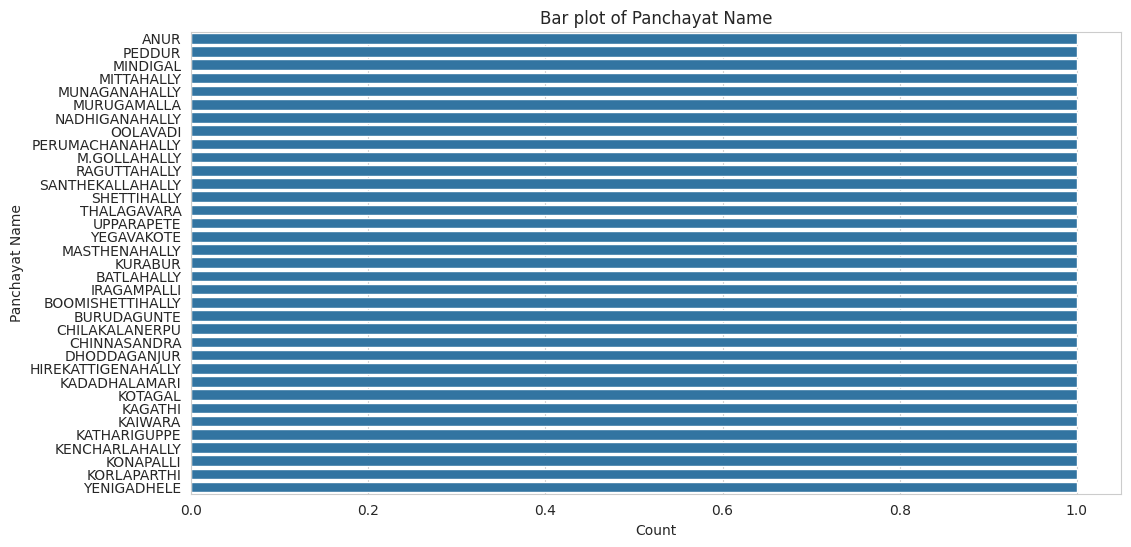

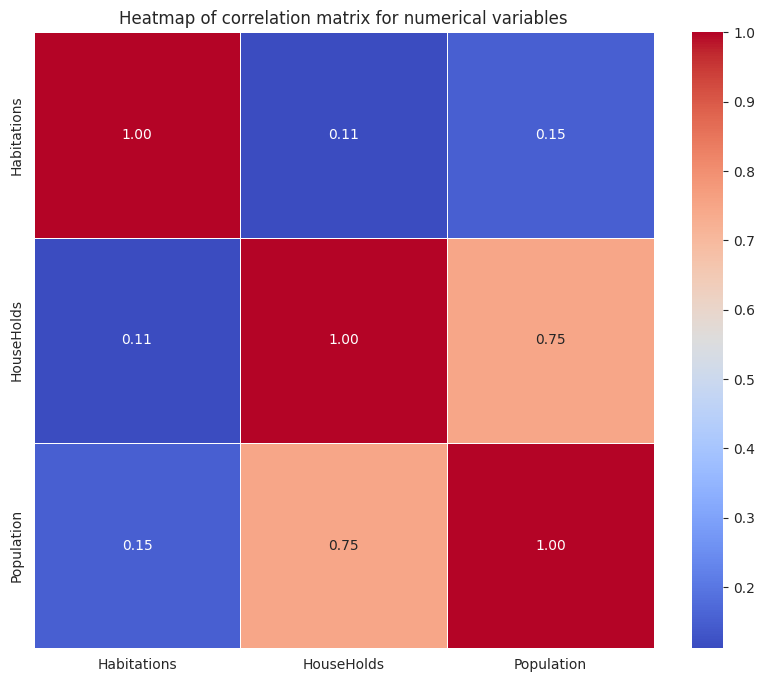

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
df['Habitations'] = df['Habitations'].astype(int)
df['HouseHolds'] = df['HouseHolds'].astype(int)
df['Population'] = df['Population'].astype(int)

# Set seaborn style
sns.set_style("whitegrid")

# Create histograms for numerical variables
numerical_variables = ['Habitations', 'HouseHolds', 'Population']
for var in numerical_variables:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[var], bins=20, kde=True)
    plt.title(f'Histogram of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()

# Create box plots for numerical variables
for var in numerical_variables:
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=df[var])
    plt.title(f'Box plot of {var}')
    plt.ylabel(var)
    plt.show()

# Create bar plot for 'Panchayat Name'
plt.figure(figsize=(12, 6))
sns.countplot(y='Panchayat', data=df, order=df['Panchayat'].value_counts().index)
plt.title('Bar plot of Panchayat Name')
plt.xlabel('Count')
plt.ylabel('Panchayat Name')
plt.show()



# Explore relationships between numerical variables using heatmap (correlation matrix)
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_variables].corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap of correlation matrix for numerical variables')
plt.show()


#Plotting the histogram for number of villages

<ipython-input-12-af9e9e18c9bc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Villages'] = df['Villages'].astype(float)


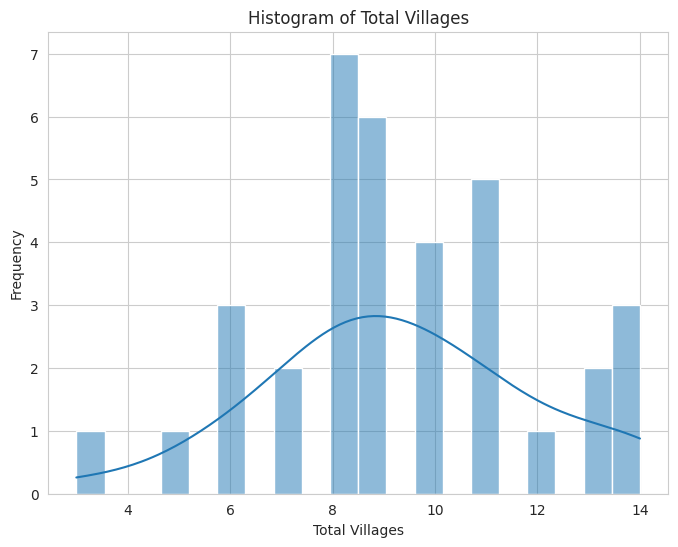

In [12]:
df['Villages'] = df['Villages'].astype(float)
plt.figure(figsize=(8, 6))
sns.histplot(df['Villages'], bins=20, kde=True)
plt.title('Histogram of Total Villages')
plt.xlabel('Total Villages')
plt.ylabel('Frequency')
plt.show()

In [13]:
# Convert 'Population' and 'Villages' columns to float or int
df['Population'] = df['Population'].astype(float)
df['Villages'] = df['Villages'].astype(float)  # Assuming 'Villages' should be converted to float as well

# Top 5 panchayats in terms of population
top_5_population = df.groupby('Panchayat')['Population'].sum().nlargest(5)
print("Top 5 panchayats in terms of population:")
print(top_5_population)

# Top 5 panchayats in terms of villages
top_5_villages = df.groupby('Panchayat')['Villages'].sum().nlargest(5)
print("\nTop 5 panchayats in terms of villages:")
print(top_5_villages)



Top 5 panchayats in terms of population:
Panchayat
UPPARAPETE          9401.0
KAGATHI             9262.0
KOTAGAL             9104.0
OOLAVADI            8956.0
PERUMACHANAHALLY    8688.0
Name: Population, dtype: float64

Top 5 panchayats in terms of villages:
Panchayat
PEDDUR         14.0
SHETTIHALLY    14.0
UPPARAPETE     14.0
KORLAPARTHI    13.0
KOTAGAL        13.0
Name: Villages, dtype: float64


<ipython-input-13-f2c7c72c2a84>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Population'] = df['Population'].astype(float)
<ipython-input-13-f2c7c72c2a84>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Villages'] = df['Villages'].astype(float)  # Assuming 'Villages' should be converted to float as well


##Analysing The data Based on top 5 panchayats according to number of villages and according to total number of villages

<ipython-input-14-ebda6f361c76>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Population'] = df['Population'].astype(float)
<ipython-input-14-ebda6f361c76>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Villages'] = df['Villages'].astype(float)  # Assuming 'Villages' should be converted to float as well
<ipython-input-14-ebda6f361c76>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=Fals

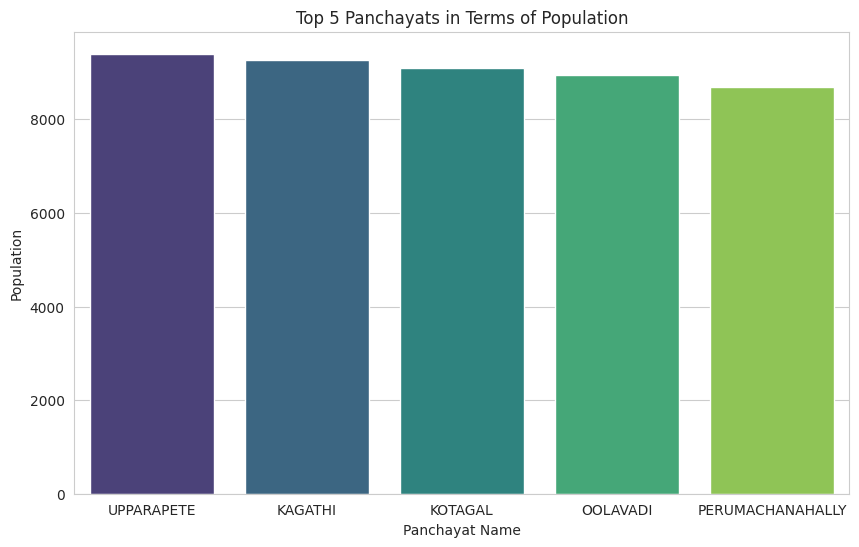

<ipython-input-14-ebda6f361c76>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5_villages.index, y=top_5_villages.values, palette='magma')


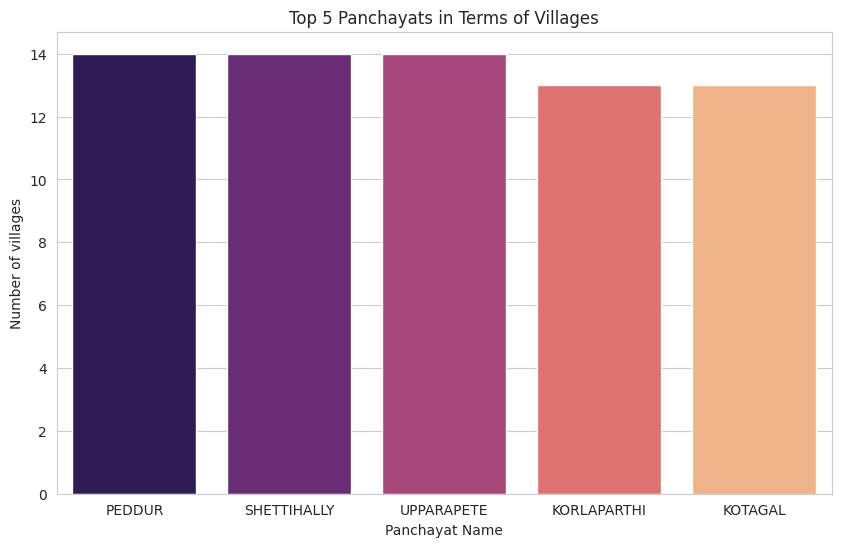

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert 'Population' and 'Villages' columns to float or int
df['Population'] = df['Population'].astype(float)
df['Villages'] = df['Villages'].astype(float)  # Assuming 'Villages' should be converted to float as well

# Top 5 panchayats in terms of population
top_5_population = df.groupby('Panchayat')['Population'].sum().nlargest(5)

# Plot horizontal bar plot for top 5 panchayats in terms of population
plt.figure(figsize=(10, 6))
sns.barplot(x=top_5_population.index, y=top_5_population.values, palette='viridis')
plt.title('Top 5 Panchayats in Terms of Population')
plt.xlabel('Panchayat Name')
plt.ylabel('Population')
plt.show()

# Top 5 panchayats in terms of villages
top_5_villages = df.groupby('Panchayat')['Villages'].sum().nlargest(5)

# Plot horizontal bar plot for top 5 panchayats in terms of villages
plt.figure(figsize=(10, 6))
sns.barplot(x=top_5_villages.index, y=top_5_villages.values, palette='magma')
plt.title('Top 5 Panchayats in Terms of Villages')
plt.xlabel('Panchayat Name')
plt.ylabel('Number of villages')
plt.show()


##Analysing top 5 panchayats in  terms of their total households and habitations


<ipython-input-15-ae7926f88464>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Habitations'] = df['Habitations'].astype(float)
<ipython-input-15-ae7926f88464>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['HouseHolds'] = df['HouseHolds'].astype(float)
<ipython-input-15-ae7926f88464>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5_habitat

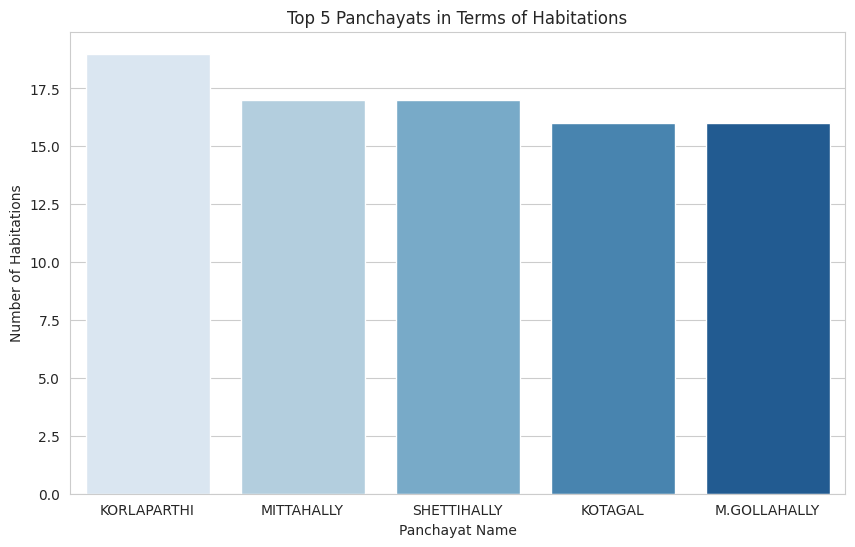

<ipython-input-15-ae7926f88464>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5_households.index, y=top_5_households.values, palette='Greens')


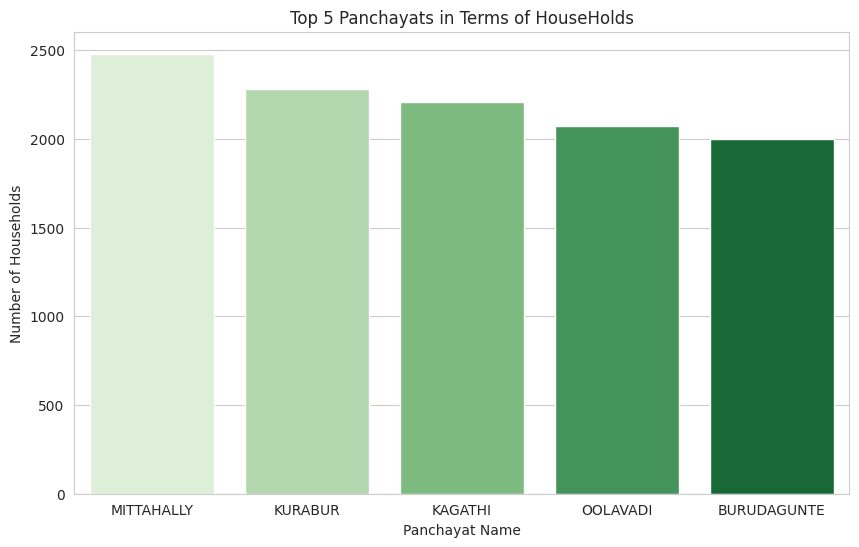

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

df['Habitations'] = df['Habitations'].astype(float)
df['HouseHolds'] = df['HouseHolds'].astype(float)

# Top 5 panchayats in terms of habitations
top_5_habitations = df.groupby('Panchayat')['Habitations'].sum().nlargest(5)

# Plot horizontal bar plot for top 5 panchayats in terms of habitations
plt.figure(figsize=(10, 6))
sns.barplot(x=top_5_habitations.index, y=top_5_habitations.values, palette='Blues')
plt.title('Top 5 Panchayats in Terms of Habitations')
plt.xlabel('Panchayat Name')
plt.ylabel('Number of Habitations')
plt.show()

# Top 5 panchayats in terms of households
top_5_households = df.groupby('Panchayat')['HouseHolds'].sum().nlargest(5)

# Plot horizontal bar plot for top 5 panchayats in terms of households
plt.figure(figsize=(10, 6))
sns.barplot(x=top_5_households.index, y=top_5_households.values, palette='Greens')
plt.title('Top 5 Panchayats in Terms of HouseHolds')
plt.xlabel('Panchayat Name')
plt.ylabel('Number of Households')
plt.show()


##Conduct statistical tests to validate hypotheses or assumptions about the data.

In [16]:
from scipy.stats import kruskal

# Group 'Population' by 'Panchayat Name'
grouped_population = [df[df['Panchayat'] == panchayat]['Population'] for panchayat in df['Panchayat'].unique()]

# Perform Kruskal-Wallis test
h_statistic, p_value = kruskal(*grouped_population)

# Print the results
print("Kruskal-Wallis test results:")
print("H-statistic:", h_statistic)
print("p-value:", p_value)

# Check if the p-value is less than a chosen significance level (e.g., 0.05)
if p_value < 0.05:
    print("The population means of different Panchayats are significantly different (reject the null hypothesis)")
else:
    print("There is no significant difference in population means of different Panchayats (fail to reject the null hypothesis)")



Kruskal-Wallis test results:
H-statistic: 34.0
p-value: 0.4677382838738124
There is no significant difference in population means of different Panchayats (fail to reject the null hypothesis)


**Insights Based on Kruskal-Wallis Test Results:**

1. **Population Variation:** The analysis suggests that the population means across different Panchayats are similar, indicating that there may not be substantial differences in population sizes..

2. **Homogeneity of Population Sizes:** The lack of significance in population means implies that the populations across different Panchayats may have similar distributions or tendencies, with no single Panchayat standing out significantly in terms of population size.

3. **Uniformity in Demographic Characteristics:** This outcome  suggest that the demographic characteristics and trends in the studied region are relatively consistent across different Panchayats.




##Analysing below 5 panchayats in terms of villages , population , habitations and households

<ipython-input-17-05c15de006cf>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bottom_5_habitations.index, y=bottom_5_habitations.values, palette='Blues')


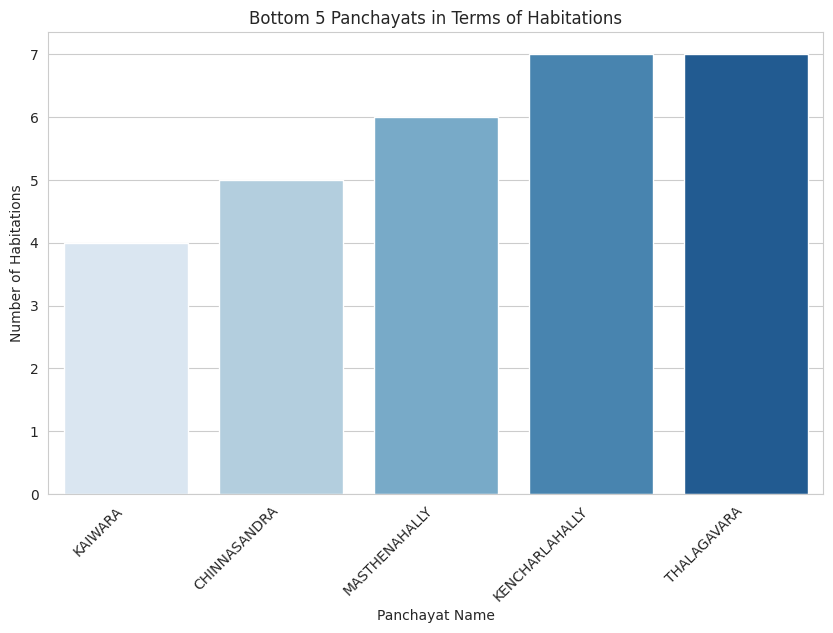

<ipython-input-17-05c15de006cf>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bottom_5_households.index, y=bottom_5_households.values, palette='Greens')


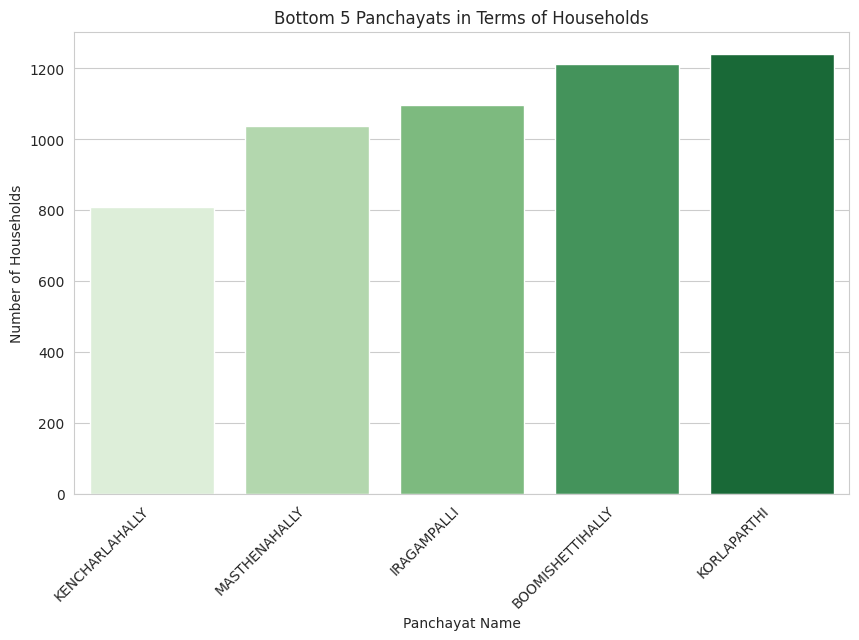

<ipython-input-17-05c15de006cf>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bottom_5_villages.index, y=bottom_5_villages.values, palette='Reds')


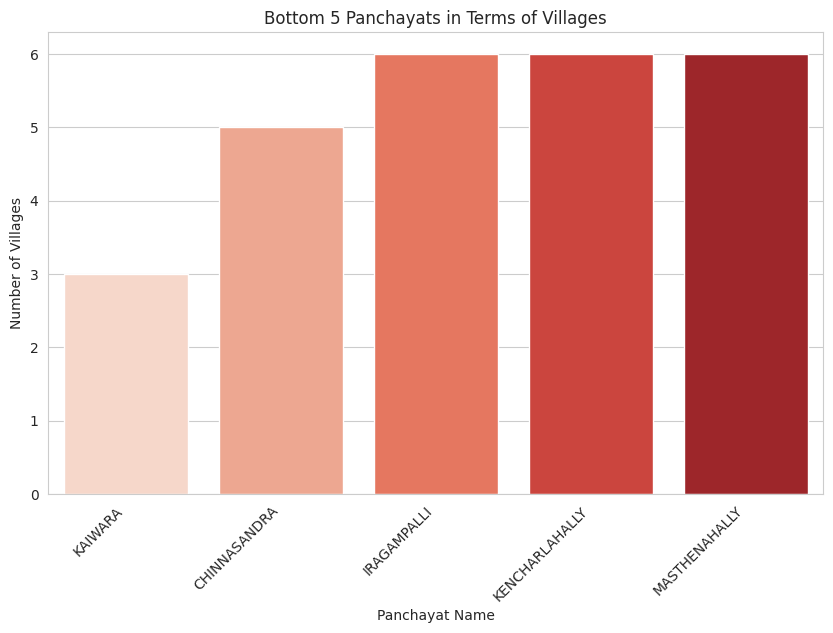

<ipython-input-17-05c15de006cf>:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bottom_5_population.index, y=bottom_5_population.values, palette='Oranges')


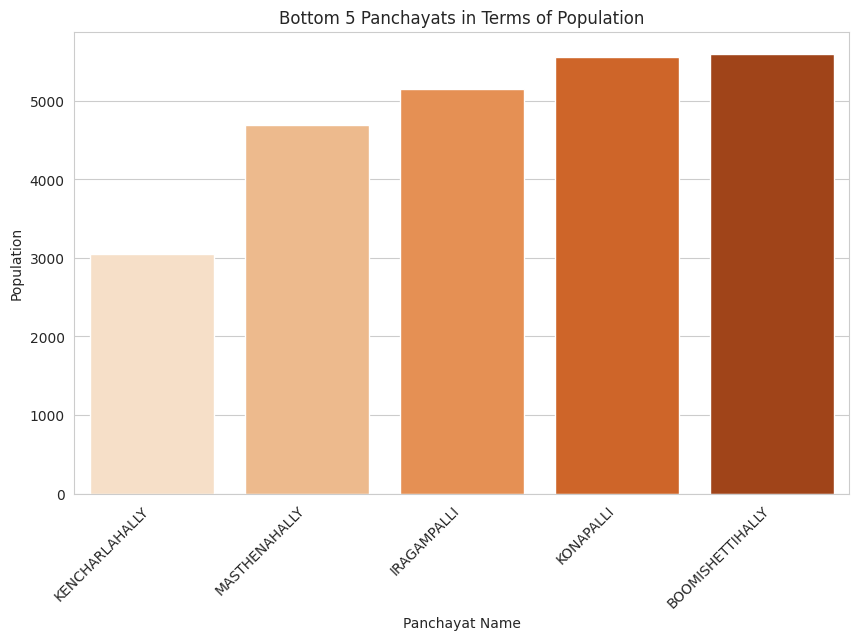

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Bottom 5 panchayats in terms of habitations
bottom_5_habitations = df.groupby('Panchayat')['Habitations'].sum().nsmallest(5)

# Plot vertical bar plot for bottom 5 panchayats in terms of habitations
plt.figure(figsize=(10, 6))
sns.barplot(x=bottom_5_habitations.index, y=bottom_5_habitations.values, palette='Blues')
plt.title('Bottom 5 Panchayats in Terms of Habitations')
plt.xlabel('Panchayat Name')
plt.ylabel('Number of Habitations')
plt.xticks(rotation=45, ha='right')
plt.show()

# Bottom 5 panchayats in terms of households
bottom_5_households = df.groupby('Panchayat')['HouseHolds'].sum().nsmallest(5)

# Plot vertical bar plot for bottom 5 panchayats in terms of households
plt.figure(figsize=(10, 6))
sns.barplot(x=bottom_5_households.index, y=bottom_5_households.values, palette='Greens')
plt.title('Bottom 5 Panchayats in Terms of Households')
plt.xlabel('Panchayat Name')
plt.ylabel('Number of Households')
plt.xticks(rotation=45, ha='right')
plt.show()

# Bottom 5 panchayats in terms of villages
bottom_5_villages = df.groupby('Panchayat')['Villages'].sum().nsmallest(5)

# Plot vertical bar plot for bottom 5 panchayats in terms of villages
plt.figure(figsize=(10, 6))
sns.barplot(x=bottom_5_villages.index, y=bottom_5_villages.values, palette='Reds')
plt.title('Bottom 5 Panchayats in Terms of Villages')
plt.xlabel('Panchayat Name')
plt.ylabel('Number of Villages')
plt.xticks(rotation=45, ha='right')
plt.show()

# Bottom 5 panchayats in terms of population
bottom_5_population = df.groupby('Panchayat')['Population'].sum().nsmallest(5)

# Plot vertical bar plot for bottom 5 panchayats in terms of population
plt.figure(figsize=(10, 6))
sns.barplot(x=bottom_5_population.index, y=bottom_5_population.values, palette='Oranges')
plt.title('Bottom 5 Panchayats in Terms of Population')
plt.xlabel('Panchayat Name')
plt.ylabel('Population')
plt.xticks(rotation=45, ha='right')
plt.show()


"MITTAHALLY stands out as a panchayat with a larger number of households, potentially qualifying as an outlier when visualizing the box plot for household distribution.

On the other hand, KENCHARLAHALLY emerges as a panchayat that could be identified as an outlier based on population size when examining the box plot."